In [264]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [265]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure"
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                        AND "Period covered by return (months)" = 12
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure"
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" is NULL
                        AND "FTE Students" > 0
                        AND "Period covered by return" = 12
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


Source       URN                    Region London Borough  \
0      academies  141375.0  Yorkshire and the Humber        Neither   
1      academies  147866.0                South East        Neither   
2      academies  147358.0                    London          Outer   
3      academies  137488.0             West Midlands        Neither   
4      academies  141685.0                    London          Inner   
...          ...       ...                       ...            ...   
16025    schools  112328.0                North West        Neither   
16026    schools  112356.0                North West        Neither   
16027    schools  112372.0                North West        Neither   
16028    schools  112415.0                North West        Neither   
16029    schools  112419.0                North West        Neither   

                                      School Name                    Type  \
0                       Dixons Manningham Academy     Academy sponsor led   
1                        Bearsted Primary Academy            Free schools   
2      Haberdashers' Aske's Crayford Temple Grove       Academy converter   
3                               The Priors School            Free schools   
4                         Langford Primary School     Academy sponsor led   
...                                           ...                     ...   
16025            Shap Endowed CofE Primary School  Voluntary aided school   
16026            Leven Valley CofE Primary School  Voluntary aided school   
16027                  Warcop CofE Primary School  Voluntary aided school   
16028      Ireleth St Peter's CofE Primary School  Voluntary aided school   
16029                           Orton CofE School  Voluntary aided school   

      Overall Phase  ...  Total Staff Costs  Maintenance & Improvement Costs  \
0           Primary  ...         1723000.00                         37000.00   
1           Primary  ...          688000.00                          3000.00   
2           Primary  ...         1023000.00                             0.00   
3           Primary  ...          467000.00                         12000.00   
4           Primary  ...         1408000.00                         35000.00   
...             ...  ...                ...                              ...   
16025       Primary  ...          462513.78                         24516.81   
16026       Primary  ...          331411.25                         26442.59   
16027       Primary  ...          434029.91                         17369.98   
16028       Primary  ...          397391.00                         22487.71   
16029       Primary  ...          373949.99                          7192.08   

         Energy  Total Costs of Educational Supplies  Catering supplies  \
0      21000.00                             86000.00           50000.00   
1      39000.00                             43000.00           56000.00   
2          0.00                            269000.00               0.00   
3       8000.00                             57000.00           16000.00   
4      42000.00                            168000.00          102000.00   
...         ...                                  ...                ...   
16025  29324.54                             66167.34           32976.42   
16026  21209.22                             50822.40           18996.26   
16027  16345.72                             62750.31           30641.76   
16028  19071.87                             45900.71           11392.13   
16029  14043.74                             39477.03           14436.29   

       Total Income  Total Expenditure  
0        2264000.00         2171000.00  
1        1113000.00          872000.00  
2        1373000.00         1410000.00  
3         648000.00          624000.00  
4        1868000.00         1897000.00  
...             ...                ...  
16025     645105.58          667720.26  
16026     489616.83          520283.52  
1

In [266]:
# staff costs. 
# Corellation between high quality teaching and 
# increased funding levels of attainment. 
# disadvantaged cohorts

# Efficiency is in staff. 80% fo funding. 
# Schools are not evidencing this. 
# Staff costs per pupil called out as a source of study. 

# MAT 

# Disadvantaged analysis add some. 

# 

In [267]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


Source       URN                    Region London Borough  \
0      academies  141375.0  Yorkshire and the Humber        Neither   
1      academies  147866.0                South East        Neither   
2      academies  147358.0                    London          Outer   
3      academies  137488.0             West Midlands        Neither   
4      academies  141685.0                    London          Inner   
...          ...       ...                       ...            ...   
16025    schools  112328.0                North West        Neither   
16026    schools  112356.0                North West        Neither   
16027    schools  112372.0                North West        Neither   
16028    schools  112415.0                North West        Neither   
16029    schools  112419.0                North West        Neither   

                                      School Name                    Type  \
0                       Dixons Manningham Academy     Academy sponsor led   
1                        Bearsted Primary Academy            Free schools   
2      Haberdashers' Aske's Crayford Temple Grove       Academy converter   
3                               The Priors School            Free schools   
4                         Langford Primary School     Academy sponsor led   
...                                           ...                     ...   
16025            Shap Endowed CofE Primary School  Voluntary aided school   
16026            Leven Valley CofE Primary School  Voluntary aided school   
16027                  Warcop CofE Primary School  Voluntary aided school   
16028      Ireleth St Peter's CofE Primary School  Voluntary aided school   
16029                           Orton CofE School  Voluntary aided school   

      Overall Phase  ...    Energy  Total Costs of Educational Supplies  \
0           Primary  ...  21000.00                             86000.00   
1           Primary  ...  39000.00                             43000.00   
2           Primary  ...      0.00                            269000.00   
3           Primary  ...   8000.00                             57000.00   
4           Primary  ...  42000.00                            168000.00   
...             ...  ...       ...                                  ...   
16025       Primary  ...  29324.54                             66167.34   
16026       Primary  ...  21209.22                             50822.40   
16027       Primary  ...  16345.72                             62750.31   
16028       Primary  ...  19071.87                             45900.71   
16029       Primary  ...  14043.74                             39477.03   

       Catering supplies  Total Income  Total Expenditure  Income per Student  \
0               50000.00    2264000.00         2171000.00         5521.951220   
1               56000.00    1113000.00          872000.00         6288.135593   
2                   0.00    1373000.00         1410000.00         6341.801386   
3               16000.00     648000.00          624000.00         8100.000000   
4              102000.00    1868000.00         1897000.00         7116.190476   
...                  ...           ...                ...                 ...   
16025           32976.42     645105.58          667720.26         7128.238453   
16026           18996.26     489616.83          520283.52         7307.713881   
16027           30641.76     589572.38          599252.02         7278.671358   
16028           11392.13     525139.21          552828.00         7501.988714   
16029           14436.29     469322.92          500179.55         8533.144000   

       Expenditure per Student  
0                  5295.121951  
1                  4926.553672  
2                  6512.702079  
3                  7800.000000  
4                  7226.666667  
...                        ...  
16025              7378.124420  
16026              7765.425672  
16027              7398.173086  
16028              7897.5428

In [268]:
df['Source'].unique()

array(['academies', 'schools'], dtype=object)

In [269]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: inf
Median IE Ratio: 0.9949834764905585
Min IE Ratio: 0.0
Max IE Ratio: inf
STD IE Ratio: nan


/Users/andrewmccall/projects/tessa/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [270]:
df['Student Buckets'] = pd.cut(df['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
df["Student Buckets"] = df["Student Buckets"].apply(lambda interval: interval.left + 200)
def create_total_ratio(col, df):
    df[col + ' vs Total Expenditure Ratio'] = df[col] / df['Total Expenditure']
def create_staff_ratio(col, df):
    df[col + ' vs Staff Cost Ratio'] = df[col] / df['Total Expenditure']
def create_student_ratio(col, df):
    df[col + ' vs FTE Students Ratio'] = df[col] / df['FTE Students']

In [271]:

df['Student Buckets'].unique()

[600, 200, 400, 800, 1000, 1400, 1200, 1600]
Categories (8, int64): [200 < 400 < 600 < 800 < 1000 < 1200 < 1400 < 1600]

In [272]:
create_total_ratio('Teaching Staff', df)
create_total_ratio('Supply Staff Costs', df)
create_total_ratio('Education support staff', df)
create_total_ratio('Other Staff Costs', df)
create_total_ratio('Total Staff Costs', df)
create_total_ratio('Maintenance & Improvement Costs', df)
create_total_ratio('Energy', df)
create_total_ratio('Total Costs of Educational Supplies', df)
create_total_ratio('Catering supplies', df)

create_staff_ratio('Teaching Staff', df)
create_staff_ratio('Supply Staff Costs', df)
create_staff_ratio('Education support staff', df)
create_staff_ratio('Other Staff Costs', df)

create_student_ratio('Teaching Staff', df)
create_student_ratio('Supply Staff Costs', df)
create_student_ratio('Education support staff', df)
create_student_ratio('Other Staff Costs', df)
create_student_ratio('Total Staff Costs', df)
create_student_ratio('Maintenance & Improvement Costs', df)
create_student_ratio('Energy', df)
create_student_ratio('Total Costs of Educational Supplies', df)
create_student_ratio('Catering supplies', df)

<Axes: ylabel='Frequency'>

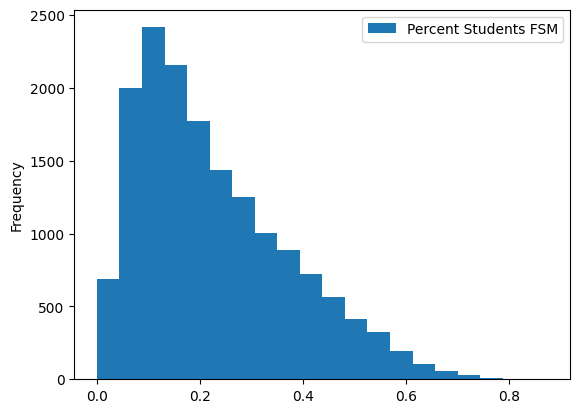

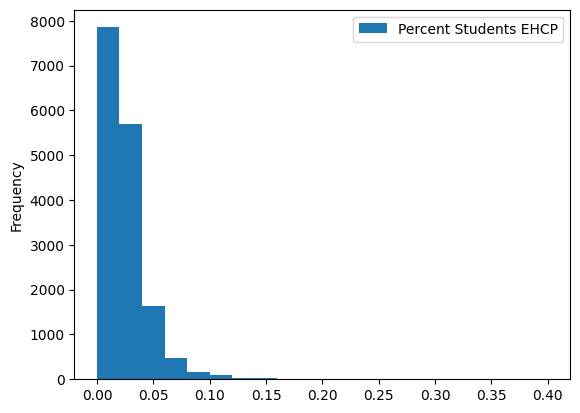

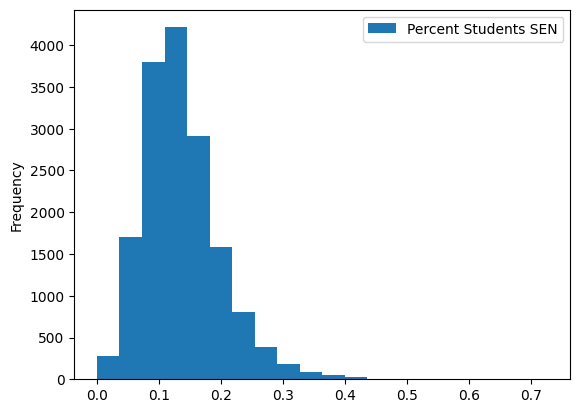

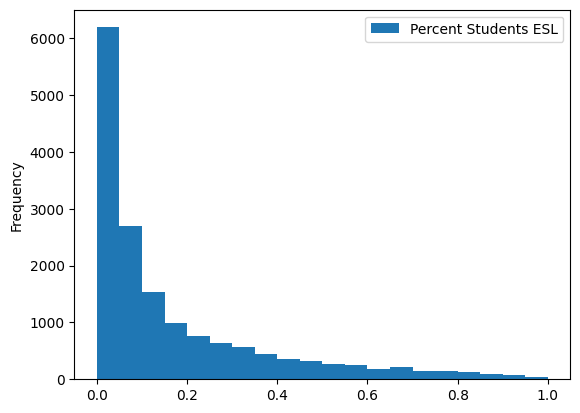

In [273]:
df[['Percent Students FSM']].plot.hist(bins=20)
df[['Percent Students EHCP']].plot.hist(bins=20)
df[['Percent Students SEN']].plot.hist(bins=20)
df[['Percent Students ESL']].plot.hist(bins=20)

In [274]:
def plot_student_groups(col): 
    df.plot.scatter(x='Percent Students FSM', y=col, c='FTE Students')
    df.plot.scatter(x='Percent Students EHCP', y=col, c='FTE Students')
    df.plot.scatter(x='Percent Students SEN', y=col, c='FTE Students')
    df.plot.scatter(x='Percent Students ESL', y=col, c='FTE Students')    

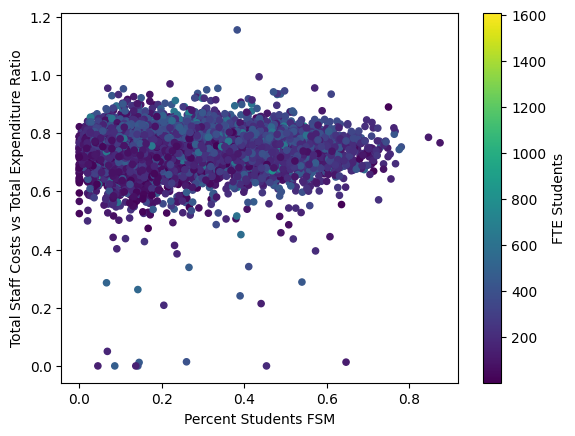

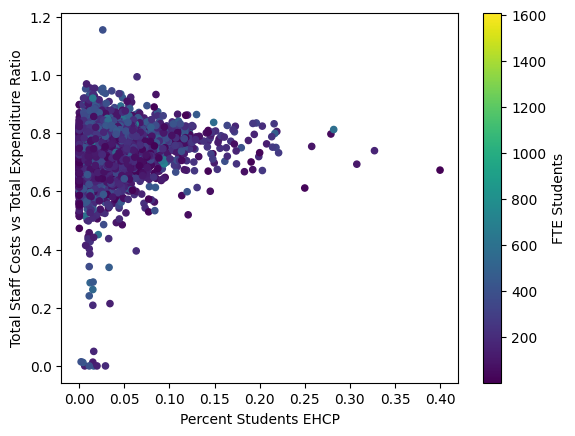

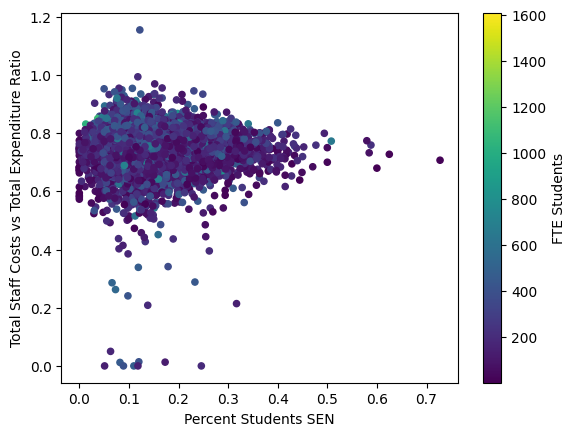

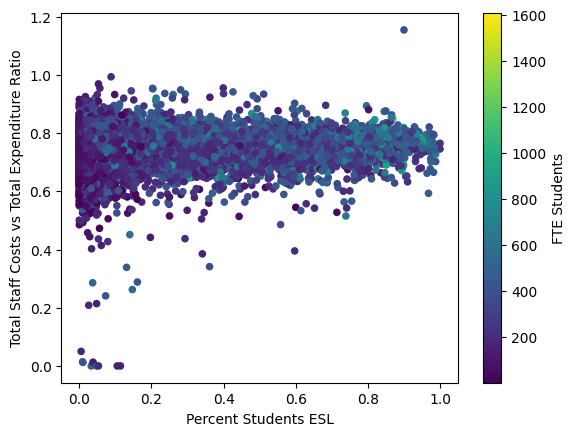

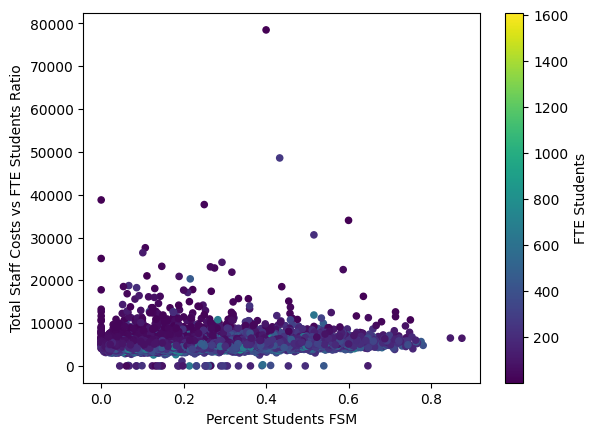

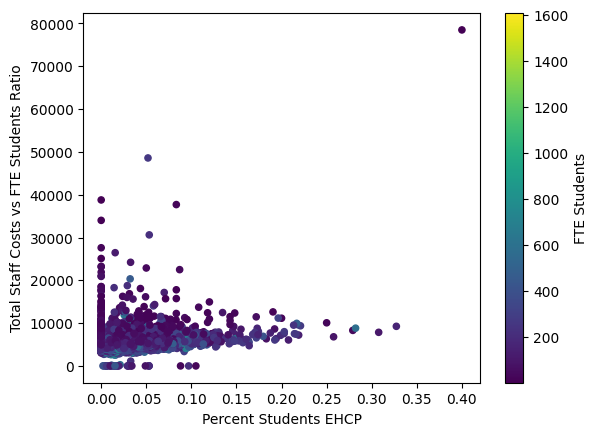

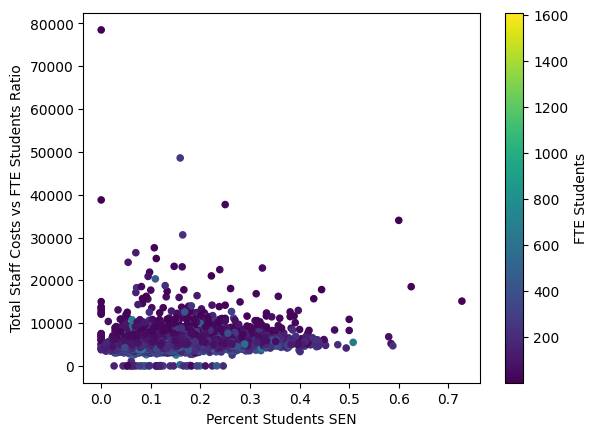

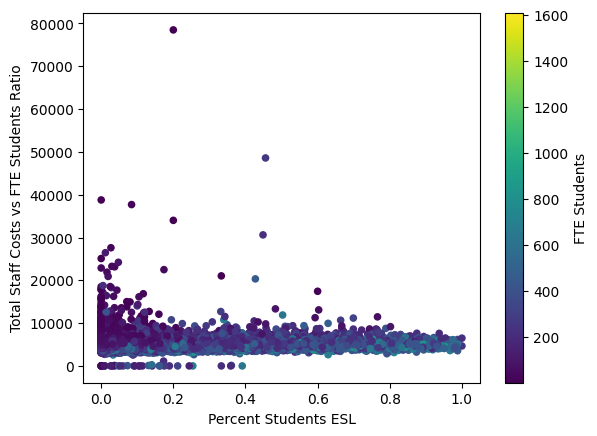

In [275]:
plot_student_groups('Total Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Total Staff Costs vs FTE Students Ratio')


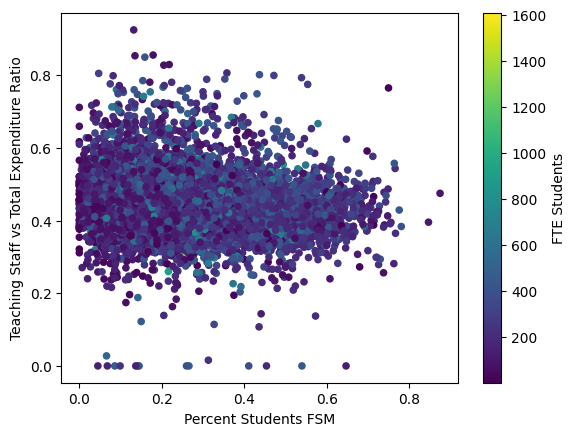

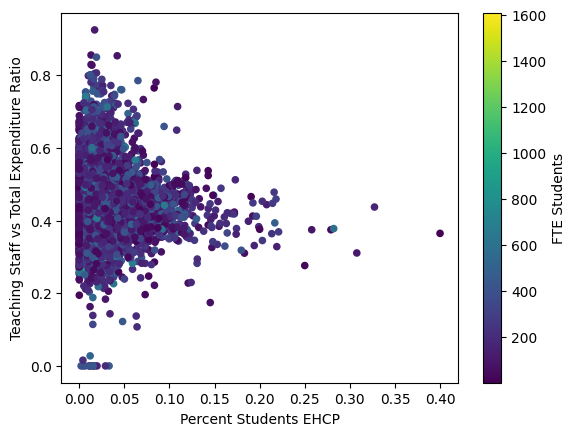

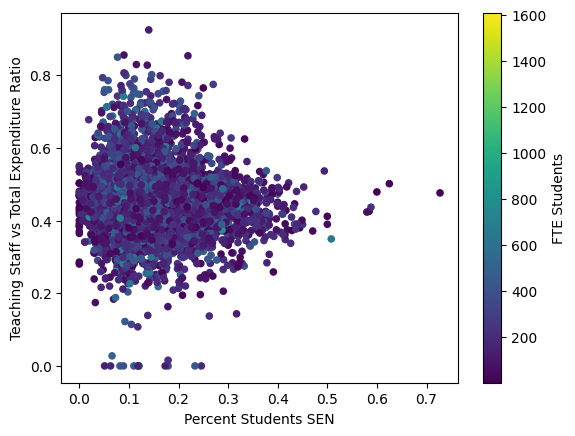

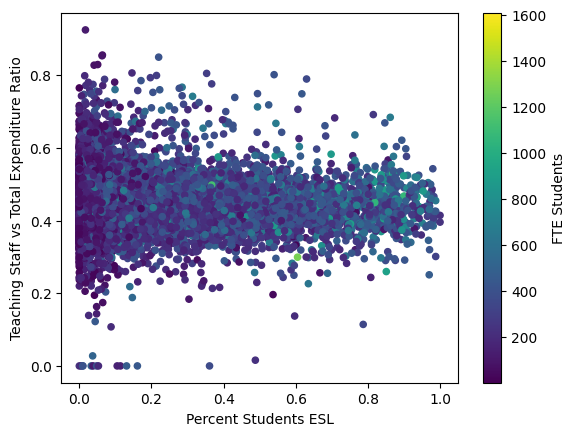

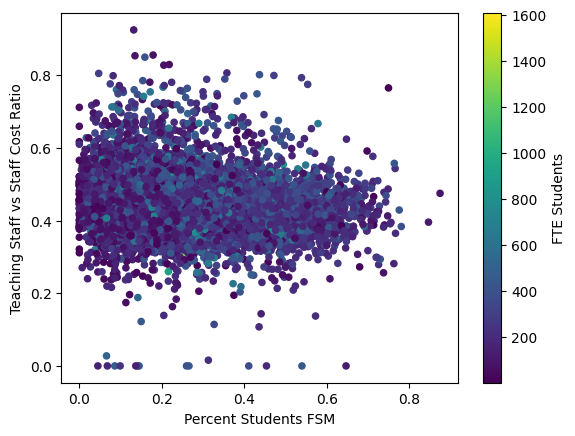

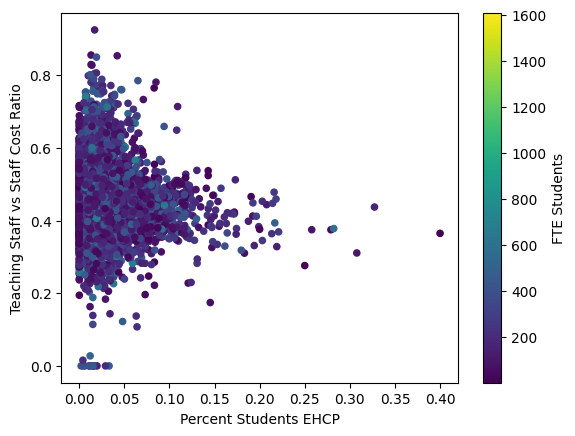

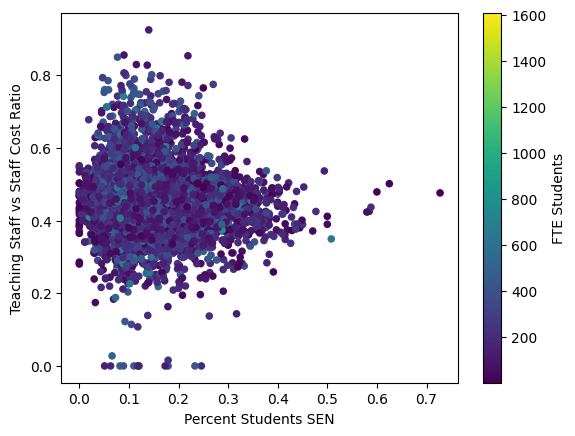

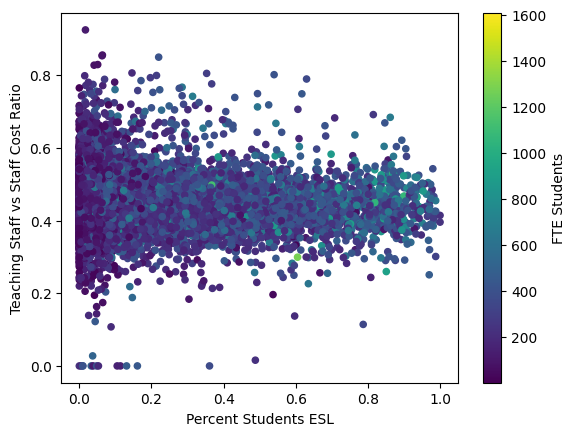

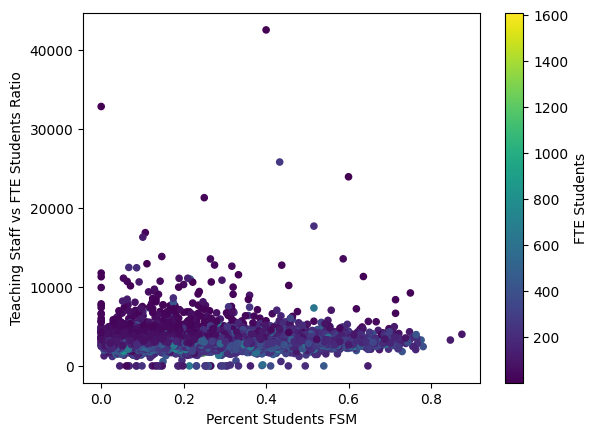

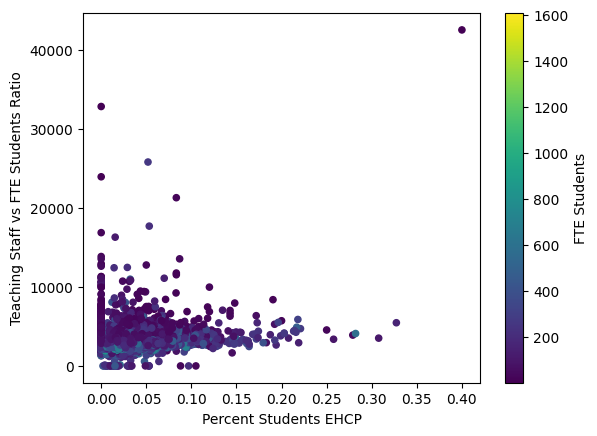

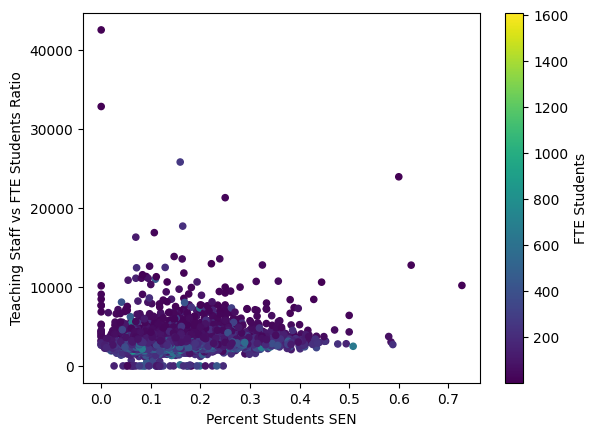

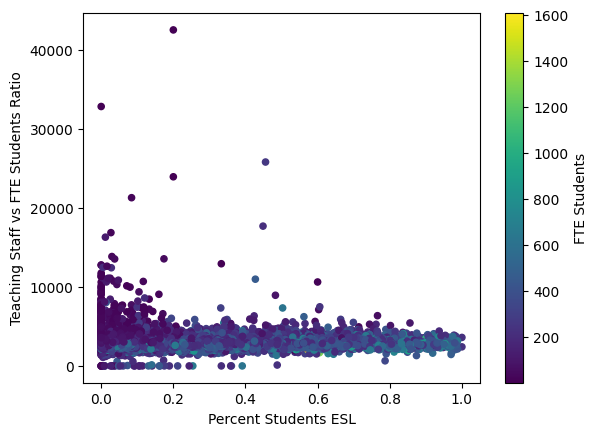

In [276]:
plot_student_groups('Teaching Staff vs Total Expenditure Ratio')
plot_student_groups('Teaching Staff vs Staff Cost Ratio')
plot_student_groups('Teaching Staff vs FTE Students Ratio')

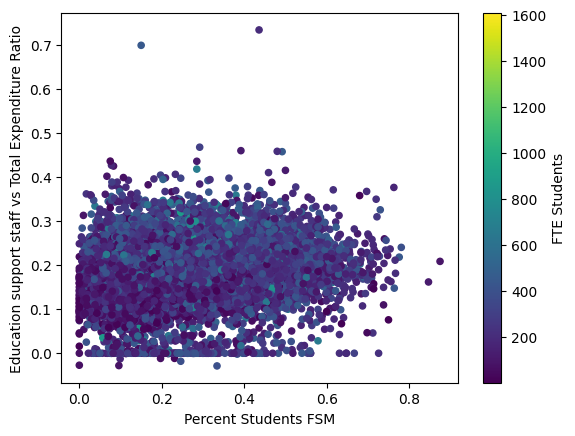

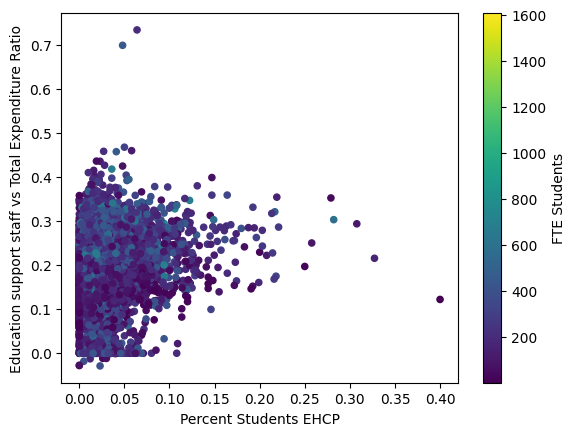

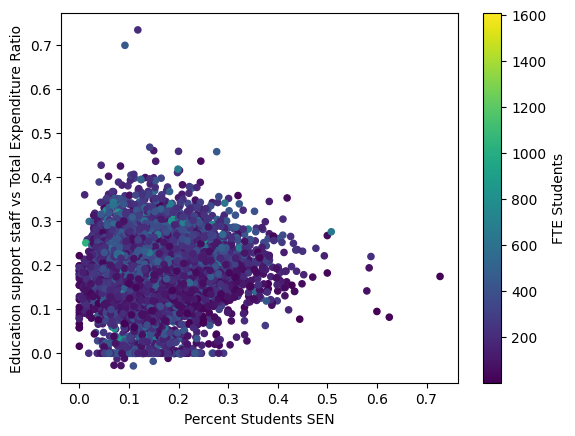

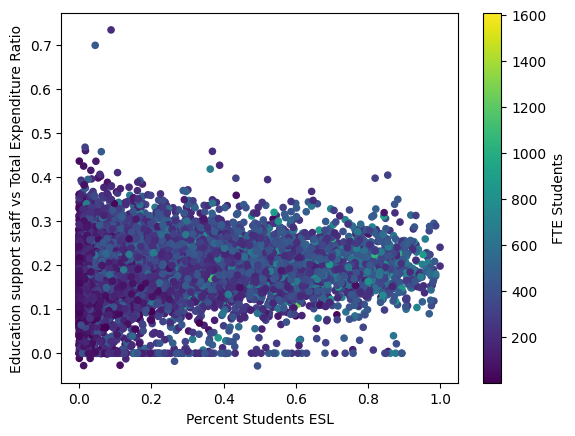

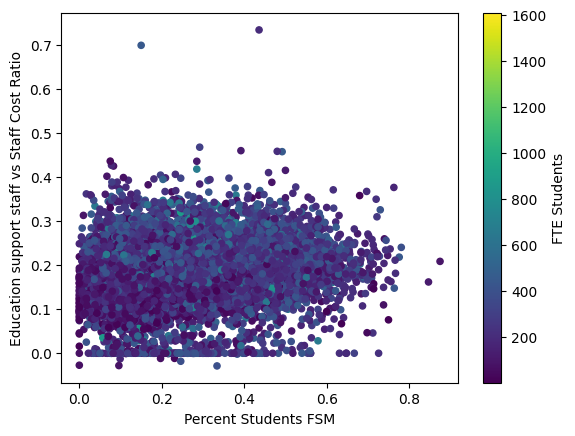

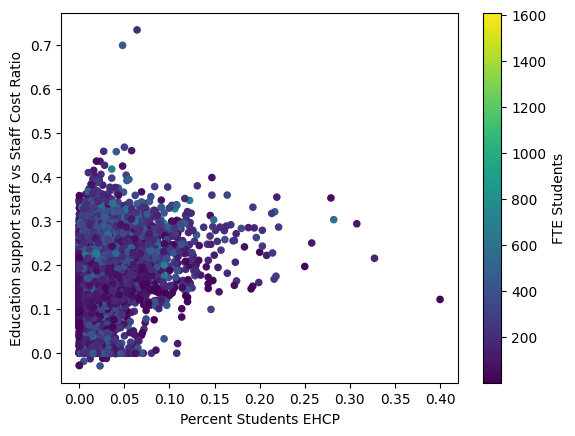

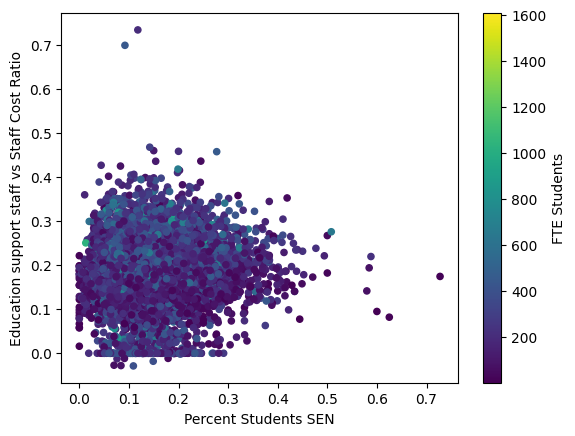

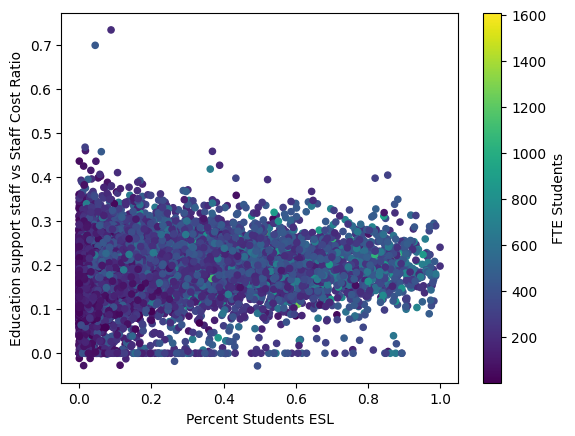

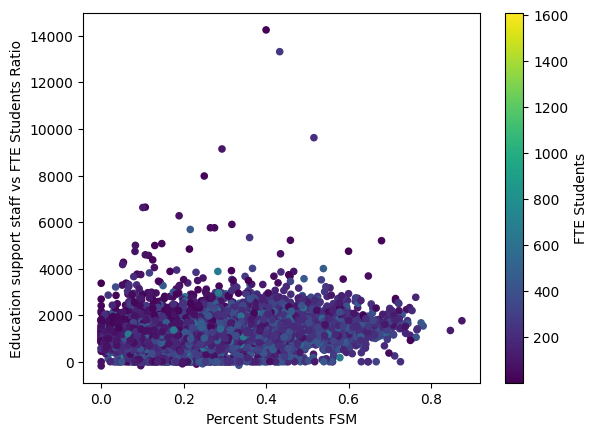

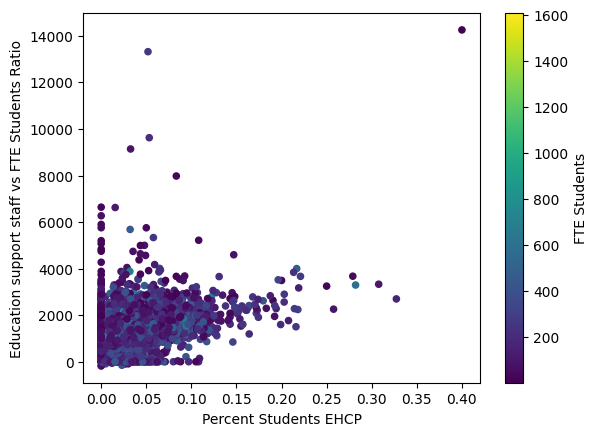

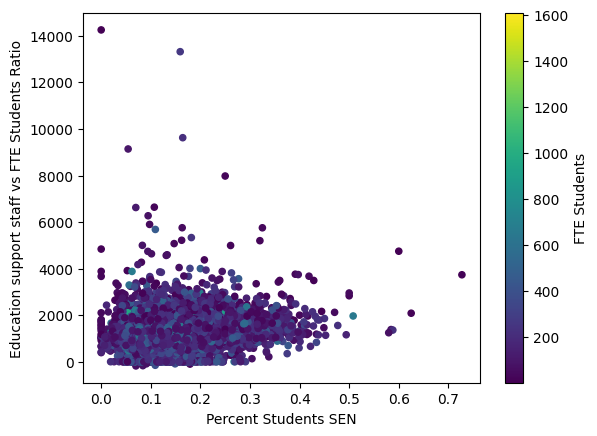

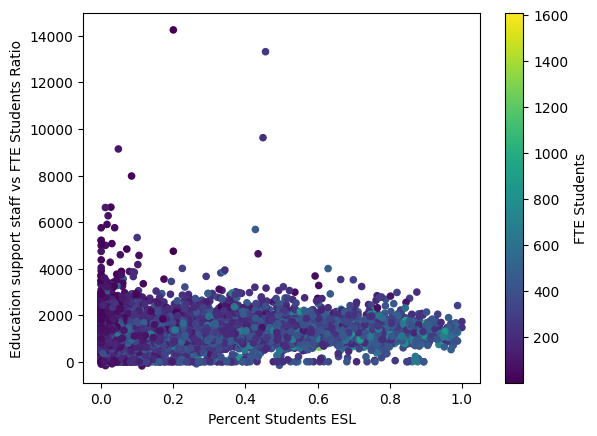

In [277]:
plot_student_groups('Education support staff vs Total Expenditure Ratio')
plot_student_groups('Education support staff vs Staff Cost Ratio')
plot_student_groups('Education support staff vs FTE Students Ratio')

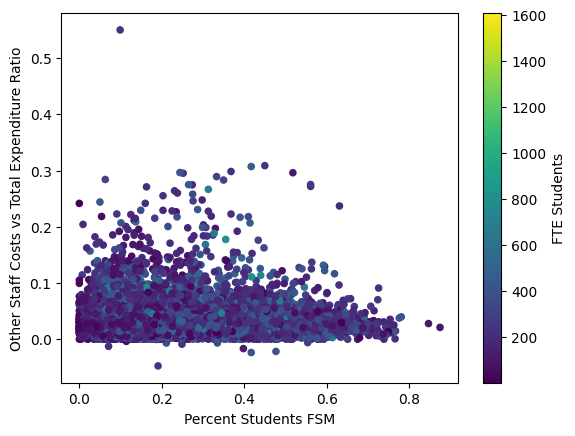

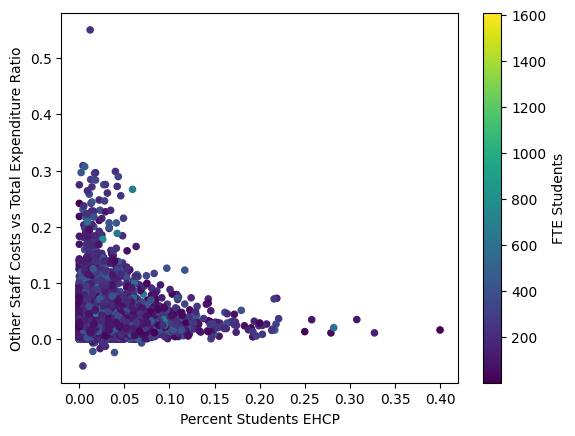

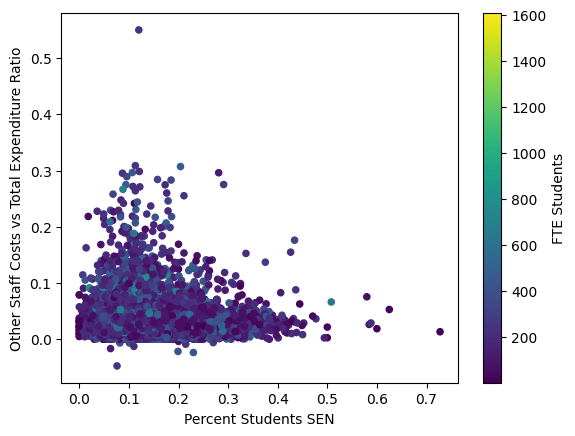

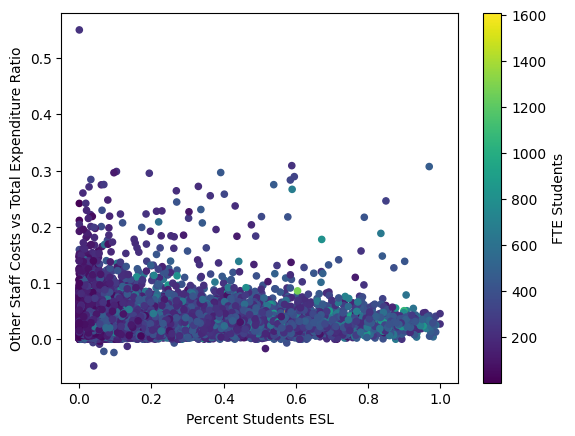

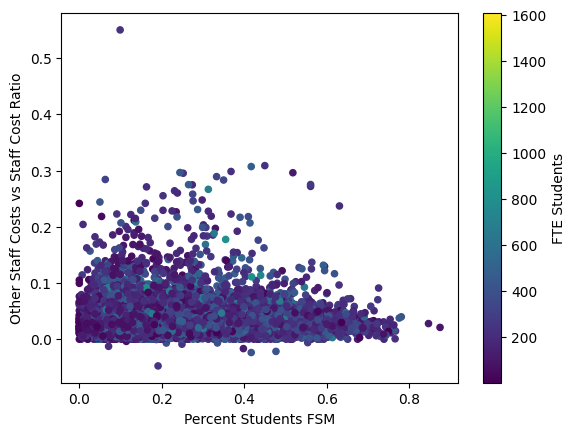

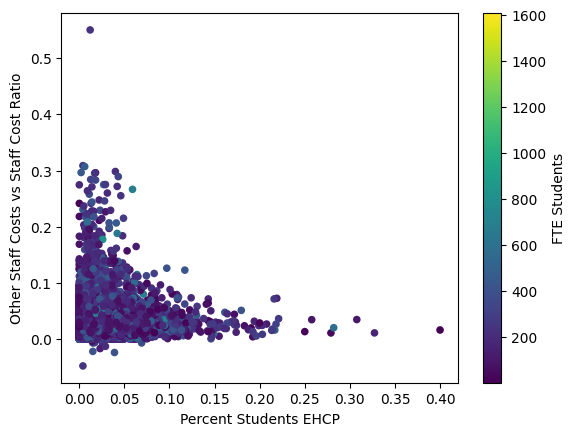

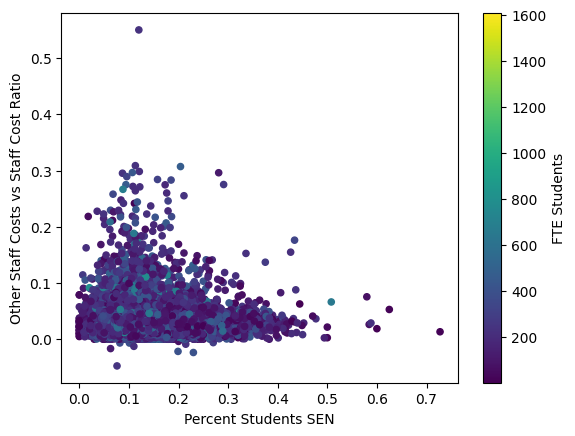

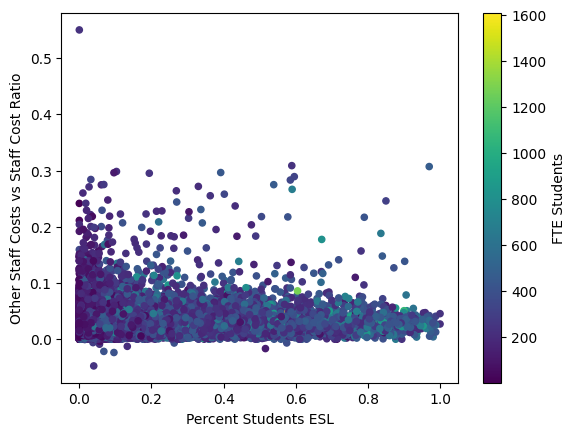

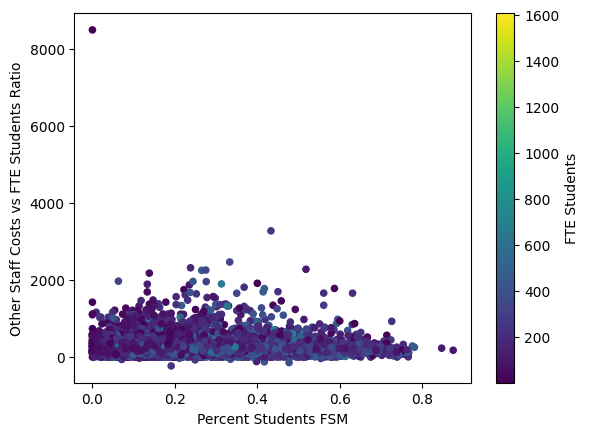

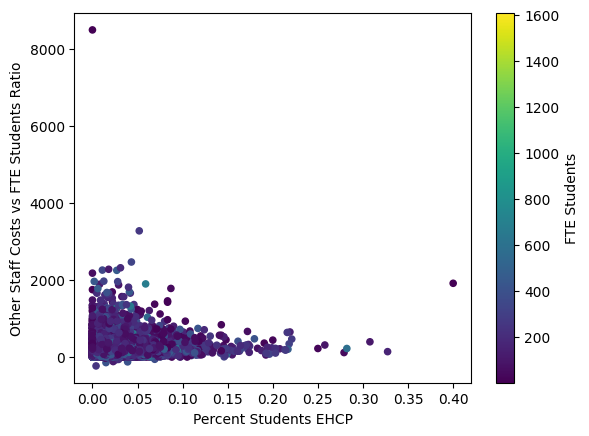

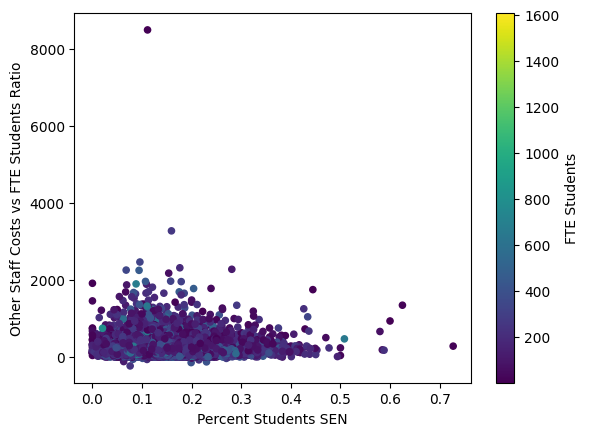

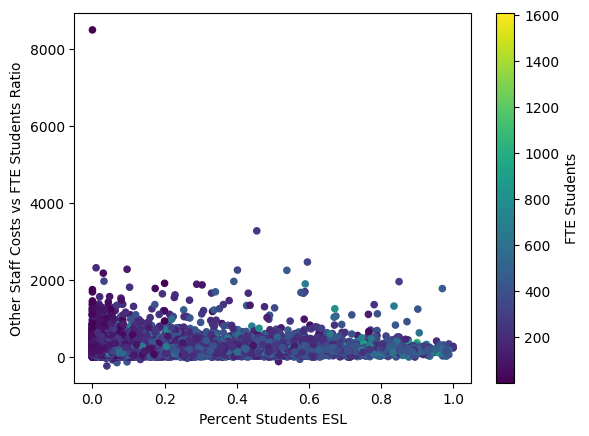

In [278]:
plot_student_groups('Other Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Other Staff Costs vs Staff Cost Ratio')
plot_student_groups('Other Staff Costs vs FTE Students Ratio')

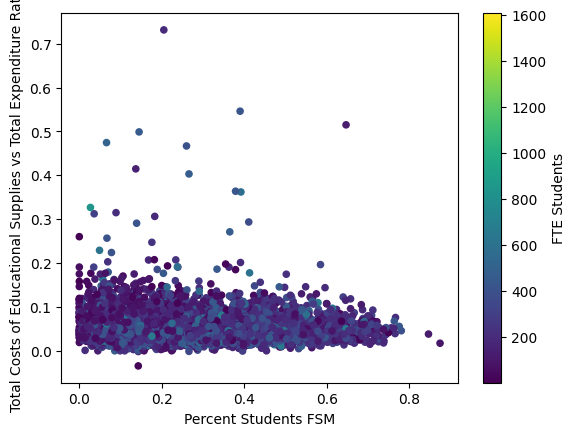

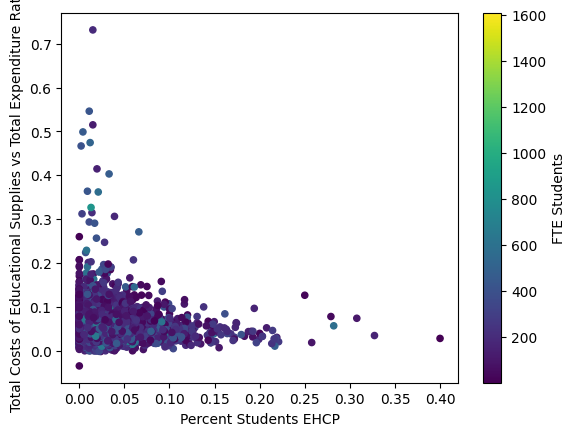

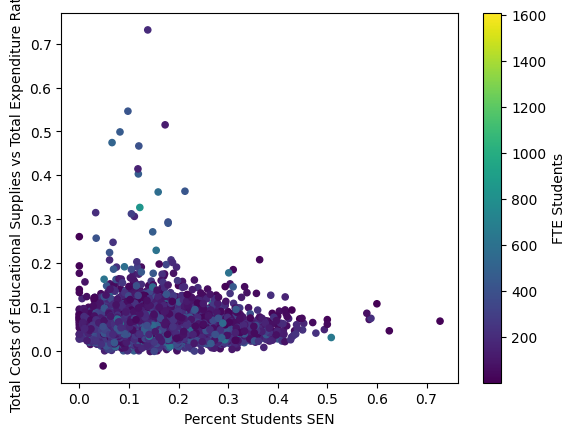

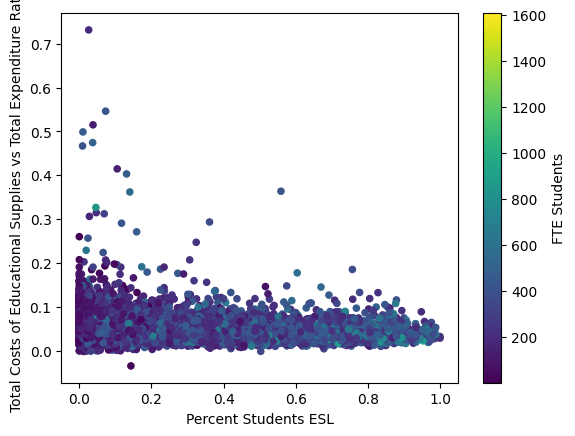

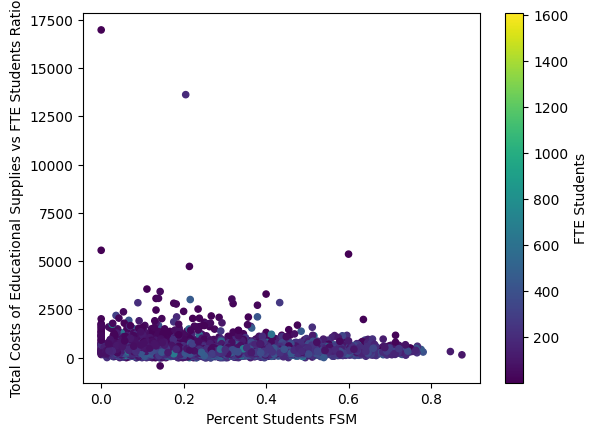

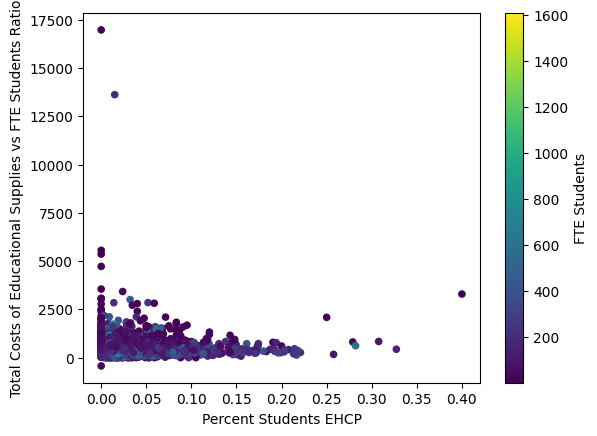

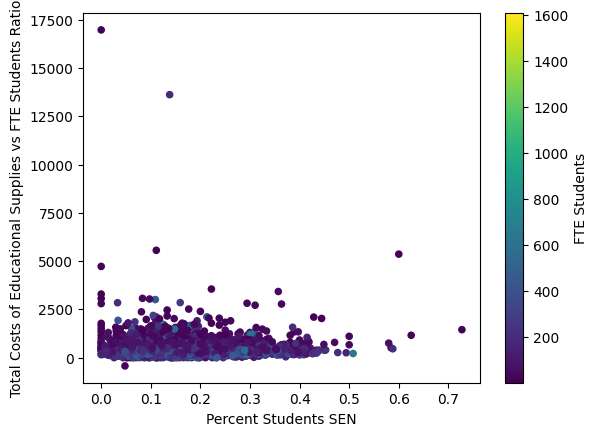

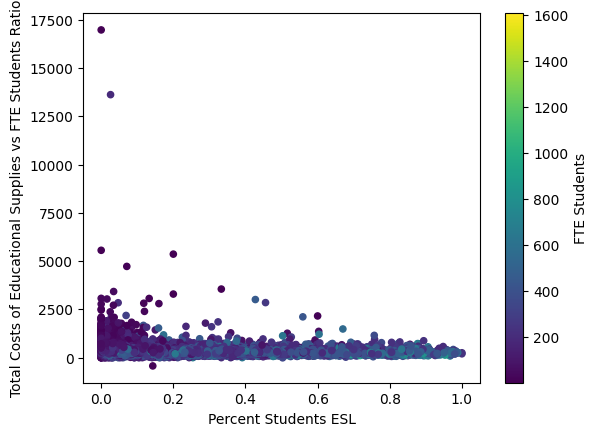

In [280]:
plot_student_groups('Total Costs of Educational Supplies vs Total Expenditure Ratio')
plot_student_groups('Total Costs of Educational Supplies vs FTE Students Ratio')

<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

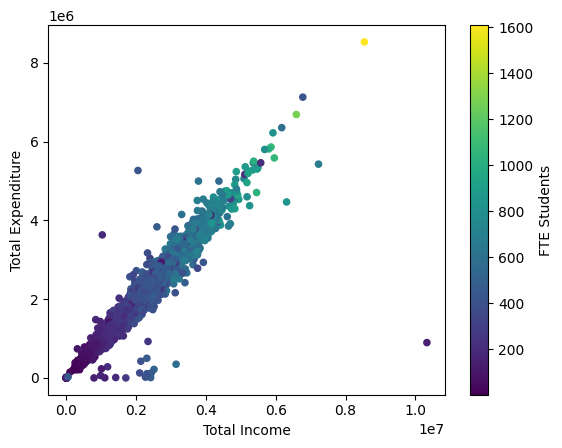

In [281]:
df.loc[(df['Overall Phase'] == 'Primary') & (df['Region'] != 'London')].plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [282]:
df['Classroom Staff'] = df['Teaching Staff'] + df['Supply Staff Costs'] + df['Education support staff']
df['Non Classroom Staff'] = df['Total Staff Costs'] - df['Classroom Staff']
df[['URN', 'School Name', 'Classroom Staff', 'Total Staff Costs', 'Other Staff Costs']]

URN                                 School Name  Classroom Staff  \
0      141375.0                   Dixons Manningham Academy       1571000.00   
1      147866.0                    Bearsted Primary Academy        627000.00   
2      147358.0  Haberdashers' Aske's Crayford Temple Grove        706000.00   
3      137488.0                           The Priors School        424000.00   
4      141685.0                     Langford Primary School       1262000.00   
...         ...                                         ...              ...   
16025  112328.0            Shap Endowed CofE Primary School        406105.53   
16026  112356.0            Leven Valley CofE Primary School        302989.83   
16027  112372.0                  Warcop CofE Primary School        389992.38   
16028  112415.0      Ireleth St Peter's CofE Primary School        364415.04   
16029  112419.0                           Orton CofE School        336429.95   

       Total Staff Costs  Other Staff Costs  
0             1723000.00           44000.00  
1              688000.00           26000.00  
2             1023000.00           17000.00  
3              467000.00           10000.00  
4             1408000.00           10000.00  
...                  ...                ...  
16025          462513.78           19740.06  
16026          331411.25           13746.23  
16027          434029.91           24066.61  
16028          397391.00           16382.66  
16029          373949.99           14121.39  

[16030 rows x 5 columns]

<Axes: xlabel='Classroom Staff', ylabel='Non Classroom Staff'>

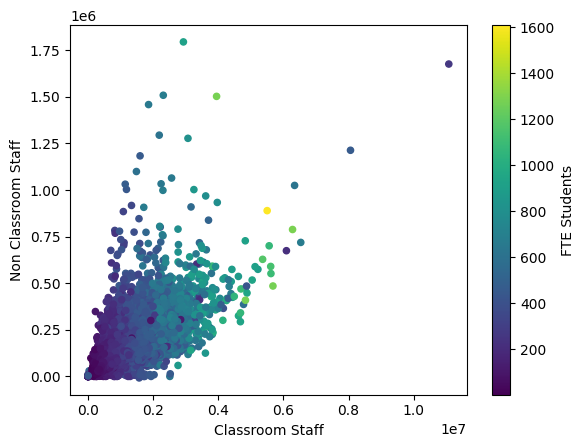

In [283]:
df.plot.scatter(x='Classroom Staff', y='Non Classroom Staff', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

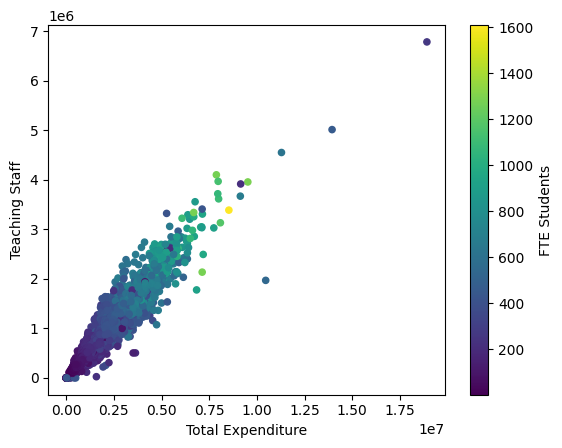

In [284]:
df.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [285]:
def show_stats (col):
    agg_func_math = {
        col + ' vs Total Expenditure Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff vs Total Expenditure Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
200                                                  0.46   0.46  0.14  0.93   
400                                                  0.45   0.45  0.02  0.81   
600                                                  0.46   0.46  0.03  0.85   
800                                                  0.46   0.46  0.23  0.77   
1000                                                 0.46   0.46  0.26  0.58   
1200                                                 0.46   0.46  0.39  0.53   
1400                                                 0.43   0.46  0.30  0.52   
1600                                                 0.40   0.40  0.40  0.40   

                             
                  std   var  
Student Buckets              
200              0.07  0.00  
400              0.06  0.00  
600              0.06  0.00  
800              0.06  0.00  
1000             0.06  0.00  
1200             0.04  0.00  
1400             0.10  0.01  
1600              NaN   NaN

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

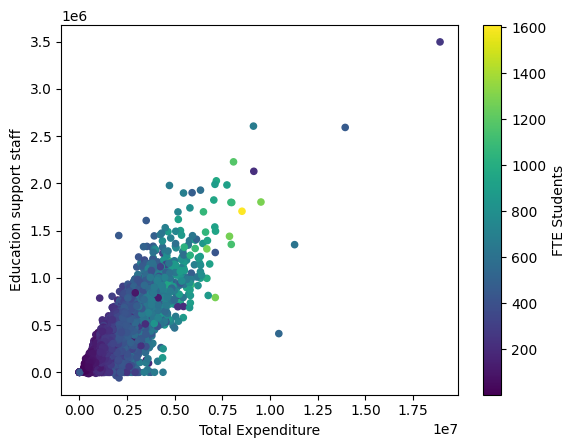

In [290]:

df.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [291]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff vs Total Expenditure Ratio         \
                                                              mean median   
Student Buckets                                                             
200                                                           0.17   0.17   
400                                                           0.19   0.19   
600                                                           0.20   0.20   
800                                                           0.20   0.20   
1000                                                          0.19   0.19   
1200                                                          0.22   0.22   
1400                                                          0.17   0.19   
1600                                                          0.20   0.20   

                                        
                  min   max   std  var  
Student Buckets                         
200              0.00  0.46  0.05  0.0  
400              0.00  0.73  0.05  0.0  
600              0.00  0.70  0.05  0.0  
800              0.01  0.42  0.05  0.0  
1000             0.04  0.32  0.05  0.0  
1200             0.16  0.28  0.03  0.0  
1400             0.11  0.20  0.04  0.0  
1600             0.20  0.20   NaN  NaN

<Axes: xlabel='Supply Staff Costs vs Total Expenditure Ratio', ylabel='Education support staff vs Total Expenditure Ratio'>

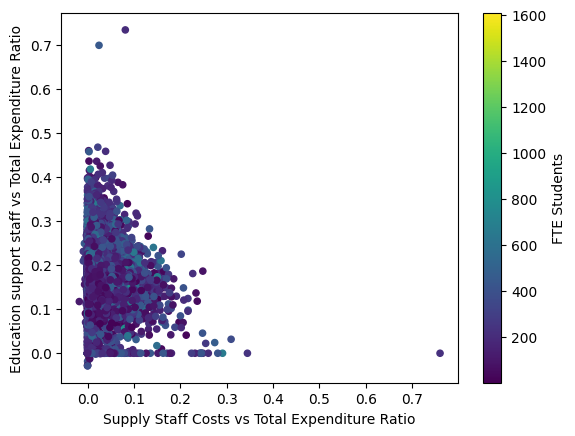

In [292]:
df.plot.scatter(x='Supply Staff Costs vs Total Expenditure Ratio', y='Education support staff vs Total Expenditure Ratio', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

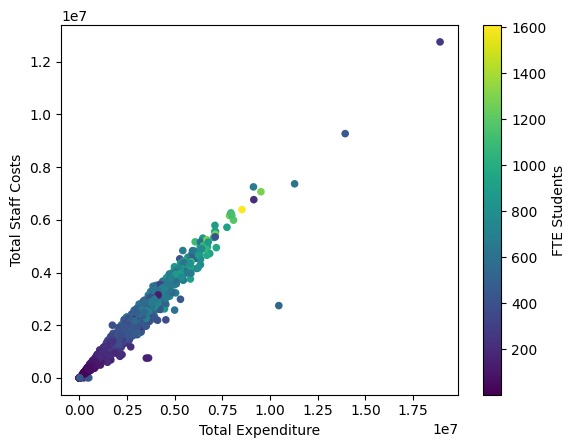

In [294]:

df.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [295]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.74   0.75  0.01   
400                                                     0.76   0.76  0.34   
600                                                     0.76   0.77  0.01   
800                                                     0.77   0.77  0.52   
1000                                                    0.76   0.77  0.59   
1200                                                    0.78   0.77  0.72   
1400                                                    0.77   0.77  0.74   
1600                                                    0.75   0.75  0.75   

                                  
                  max   std  var  
Student Buckets                   
200              0.97  0.05  0.0  
400              1.15  0.05  0.0  
600              0.95  0.05  0.0  
800              0.92  0.05  0.0  
1000             0.87  0.05  0.0  
1200             0.85  0.04  0.0  
1400             0.78  0.02  0.0  
1600             0.75   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

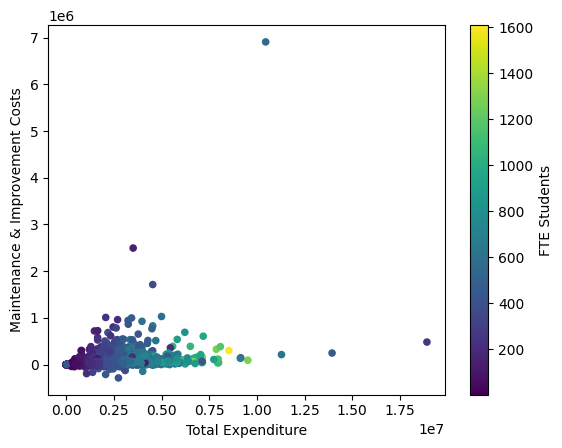

In [296]:

df.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [297]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs vs Total Expenditure Ratio  \
                                                                      mean   
Student Buckets                                                              
200                                                           0.02           
400                                                           0.02           
600                                                           0.02           
800                                                           0.02           
1000                                                          0.02           
1200                                                          0.02           
1400                                                          0.02           
1600                                                          0.04           

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.02  0.00  0.71  0.02  0.0  
400               0.02  0.00  0.49  0.02  0.0  
600               0.02  0.00  0.66  0.02  0.0  
800               0.01  0.00  0.23  0.02  0.0  
1000              0.01  0.00  0.11  0.02  0.0  
1200              0.01  0.00  0.07  0.02  0.0  
1400              0.02  0.01  0.04  0.02  0.0  
1600              0.04  0.04  0.04   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

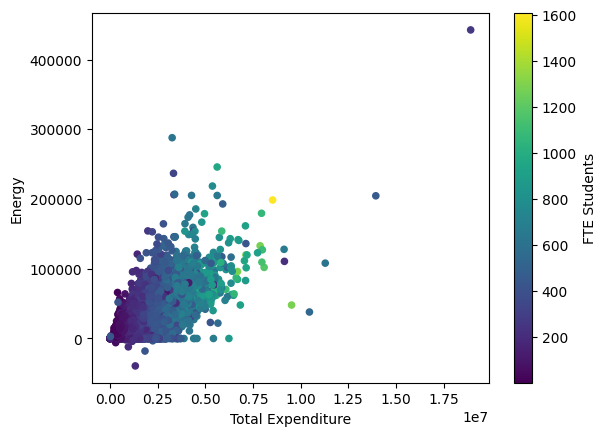

In [298]:

df.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [299]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy vs Total Expenditure Ratio                           \
                                             mean median   min   max   std   
Student Buckets                                                              
200                                          0.02   0.02  0.00  0.16  0.01   
400                                          0.02   0.02  0.00  0.08  0.01   
600                                          0.02   0.02  0.00  0.12  0.01   
800                                          0.02   0.01  0.00  0.09  0.01   
1000                                         0.02   0.02  0.01  0.04  0.01   
1200                                         0.02   0.01  0.01  0.03  0.00   
1400                                         0.01   0.02  0.01  0.02  0.01   
1600                                         0.02   0.02  0.02  0.02   NaN   

                      
                 var  
Student Buckets       
200              0.0  
400              0.0  
600              0.0  
800              0.0  
1000             0.0  
1200             0.0  
1400             0.0  
1600             NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

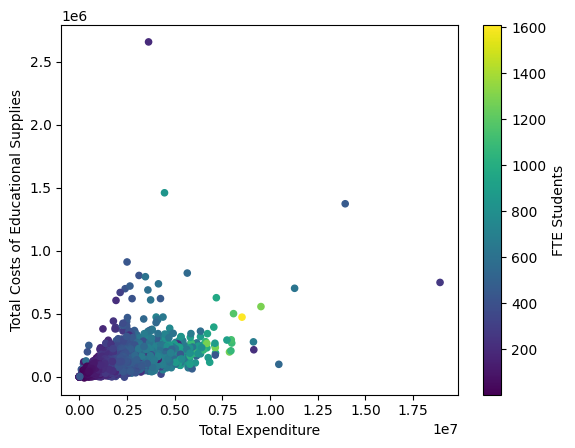

In [300]:

df.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [301]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies vs Total Expenditure Ratio  \
                                                                          mean   
Student Buckets                                                                  
200                                                           0.06               
400                                                           0.05               
600                                                           0.05               
800                                                           0.05               
1000                                                          0.04               
1200                                                          0.04               
1400                                                          0.04               
1600                                                          0.06               

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.05  0.00  0.73  0.03  0.0  
400               0.05  0.00  0.31  0.02  0.0  
600               0.05  0.01  0.55  0.03  0.0  
800               0.04  0.01  0.23  0.02  0.0  
1000              0.04  0.02  0.33  0.03  0.0  
1200              0.03  0.03  0.06  0.01  0.0  
1400              0.04  0.03  0.06  0.01  0.0  
1600              0.06  0.06  0.06   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

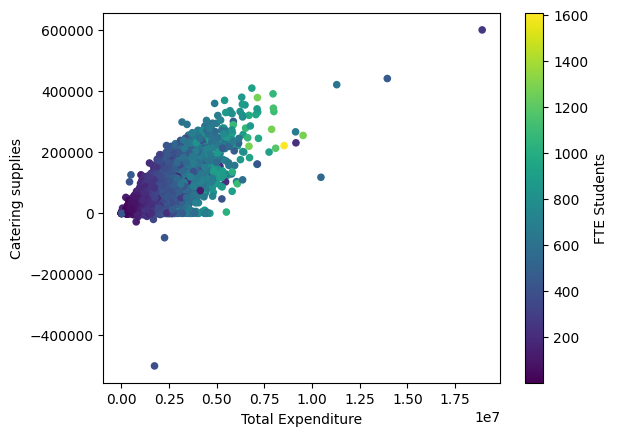

In [302]:

df.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [303]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.04   0.04  0.00   
400                                                     0.04   0.04  0.00   
600                                                     0.04   0.04  0.00   
800                                                     0.04   0.04  0.00   
1000                                                    0.04   0.04  0.00   
1200                                                    0.03   0.03  0.00   
1400                                                    0.04   0.03  0.03   
1600                                                    0.03   0.03  0.03   

                                  
                  max   std  var  
Student Buckets                   
200              0.60  0.02  0.0  
400              0.11  0.01  0.0  
600              0.25  0.02  0.0  
800              0.09  0.01  0.0  
1000             0.07  0.01  0.0  
1200             0.05  0.02  0.0  
1400             0.05  0.01  0.0  
1600             0.03   NaN  NaN